In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


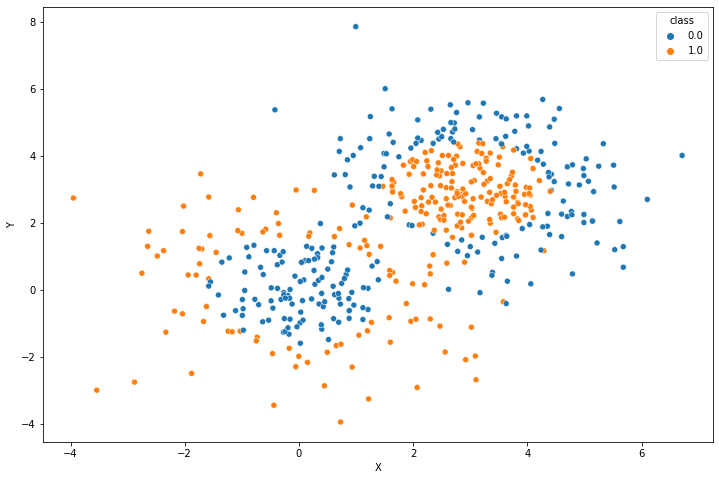

In [3]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [4]:
from sklearn.linear_model import LogisticRegression

X = circ.drop("class", axis=1)
y = circ["class"]

model = LogisticRegression()

model.fit(X, y)

LogisticRegression()

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y, model.predict(X), digits=3))

              precision    recall  f1-score   support

         0.0      0.432     0.484     0.457       250
         1.0      0.414     0.364     0.387       250

    accuracy                          0.424       500
   macro avg      0.423     0.424     0.422       500
weighted avg      0.423     0.424     0.422       500



In [6]:
print(model.coef_)
print(model.intercept_)

[[-0.00316169 -0.01204832]]
[0.0284847]


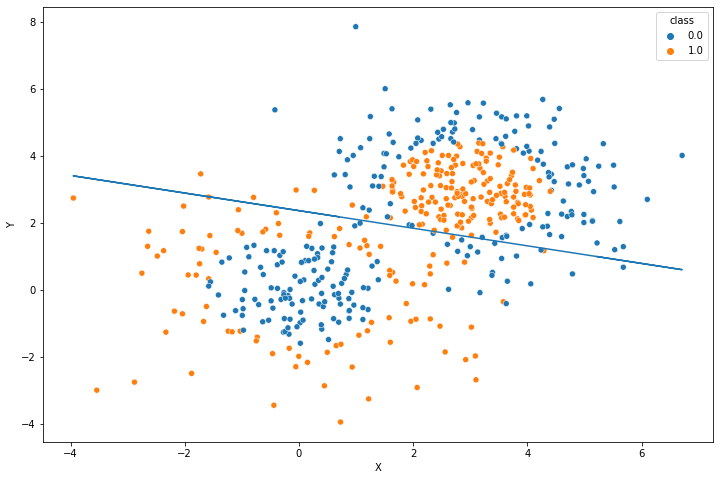

In [7]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);
plt.plot(circ['X'], (circ['X']*-0.00316169 + 0.0284847) / 0.01204832)

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [8]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

all_k = [1, 3, 10, 30, 40, 60]

train_accuracy= {}
test_accuracy = {}

for k in all_k:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    
    train_accuracy[k] = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy[k] = accuracy_score(y_test, knn.predict(X_test))

print(train_accuracy)
print(test_accuracy)


{1: 1.0, 3: 0.9475, 10: 0.915, 30: 0.8525, 40: 0.8, 60: 0.6925}
{1: 0.89, 3: 0.87, 10: 0.85, 30: 0.74, 40: 0.75, 60: 0.73}


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [11]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [12]:
[i for i in itertools.product([0, 1], repeat=2)]

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [13]:
[i for i in itertools.product([0, 1, 2], repeat=2)][:6]

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

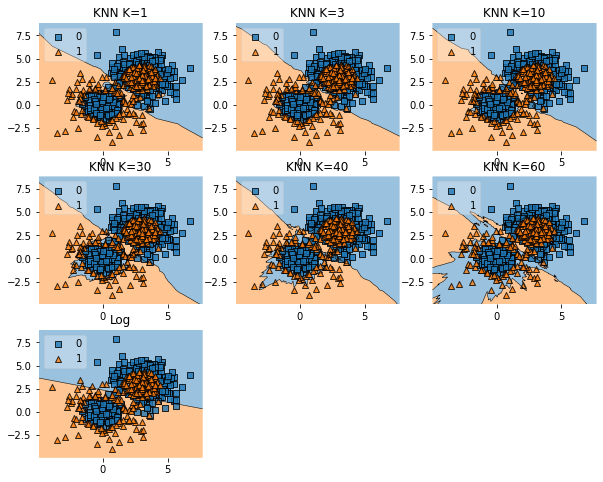

In [29]:
gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd  in zip(
    [KNeighborsClassifier(n_neighbors=k) for k in all_k] + [LogisticRegression()],
    [f"KNN K={k}" for k in all_k] + ["Log"], 
    [i for i in itertools.product([0, 1, 2], repeat=2)][:7]
):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [14]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier())])

param_grid = {
    'KNN__n_neighbors': [1,5,10],
}

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)


search = GridSearchCV(pipe, param_grid, cv=ps)

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)






Best parameter (CV score=0.65717):
{'KNN__n_neighbors': 10}


In [17]:
pipe = Pipeline([('KNN', KNeighborsClassifier())])

param_grid = {
    'KNN__n_neighbors': [1,5,10],
}

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)


search = GridSearchCV(pipe, param_grid, cv=ps)

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.44724):
{'KNN__n_neighbors': 10}


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [18]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=10, p=1))])

pipe.fit(X_train, y_train)

accuracy_score(y_test, pipe.predict(X_test))





0.6611476094634109

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [19]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


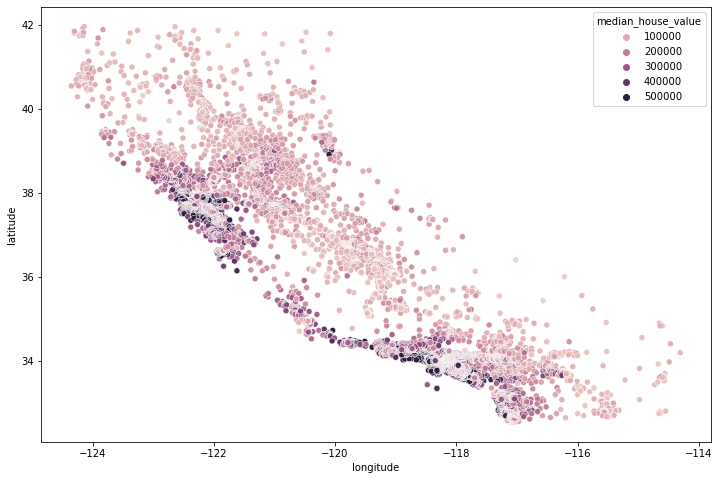

In [20]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

pipe = LinearRegression()

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

linear_cv = cross_validate(pipe, X, y, 
                           cv=ps, scoring='neg_root_mean_squared_error')

linear_cv['test_score']



array([-100976.69240278])

In [22]:
from sklearn.neighbors import KNeighborsRegressor

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsRegressor())])

param_grid = {
    'KNN__n_neighbors': range(1, 10)
}

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)


search = GridSearchCV(pipe, param_grid, cv=ps, scoring='neg_root_mean_squared_error',)

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-61031.66493):
{'KNN__n_neighbors': 5}


In [29]:
def kernel(distances, h=1):
        print(h)
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from functools import partial

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsRegressor(n_neighbors=5))])

param_grid = {
    'KNN__weights': [partial(kernel, h=i) for i in np.arange(0.02,0.1,0.01)]
}

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)


search = GridSearchCV(pipe, param_grid, cv=ps, scoring='neg_root_mean_squared_error',)

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

0.02
0.03
0.039999999999999994
0.049999999999999996
0.06
0.06999999999999999
0.07999999999999999
0.09
Best parameter (CV score=-60678.25075):
{'KNN__weights': functools.partial(<function kernel at 0x000001A55C0E71F0>, h=0.02)}


In [32]:
search.cv_results_

{'mean_fit_time': array([0.00603414, 0.00503016, 0.00500822, 0.00499964, 0.00500202,
        0.00599909, 0.00499701, 0.00496578]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.02900052, 0.03003359, 0.03000069, 0.02799964, 0.02799821,
        0.02800059, 0.02896762, 0.02903271]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0.]),
 'param_KNN__weights': masked_array(data=[functools.partial(<function kernel at 0x000001A55C0E71F0>, h=0.02),
                    functools.partial(<function kernel at 0x000001A55C0E71F0>, h=0.03),
                    functools.partial(<function kernel at 0x000001A55C0E71F0>, h=0.039999999999999994),
                    functools.partial(<function kernel at 0x000001A55C0E71F0>, h=0.049999999999999996),
                    functools.partial(<function kernel at 0x000001A55C0E71F0>, h=0.06),
                    functools.partial(<function kernel at 0x000001A55C0E71F0>, h=0.06999999999999999),
                    f